### Dataset description
Dataset created by Jose Portilla and Pierian Data for his Udemy course (Python for Data Science and Machine Learning Bootcamp).
**Let's explore the data to determine who is most likely to click on the ad!**

### Libraries we use

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
%matplotlib inline

### Explore dataset

In [30]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/saidRaiss/dataset/master/advertising.csv'
)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Then the dataset contains 1000 samples and 9 predictores. **Clicked on Ad** attribute is the output that must be predicted.

In [32]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


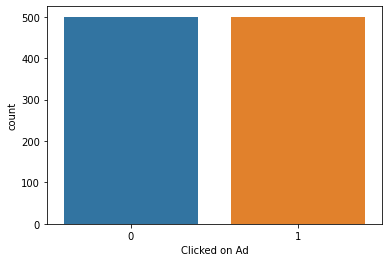

In [33]:
classes = data['Clicked on Ad']
ax = sns.countplot(x=classes, data=data)

From the figure above, the dataset is equilibrated, which will make the study more trusted.

### Dataset visualization

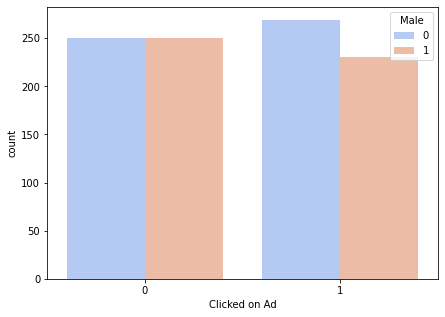

In [34]:
# Click on Ad according to gender
plt.figure(figsize=(7, 5))
sns.countplot(x='Clicked on Ad', data=data, hue='Male', palette='coolwarm')

Women tend to click more on ads!

Text(0.5, 1.0, 'Ad clicked hourly distribution')

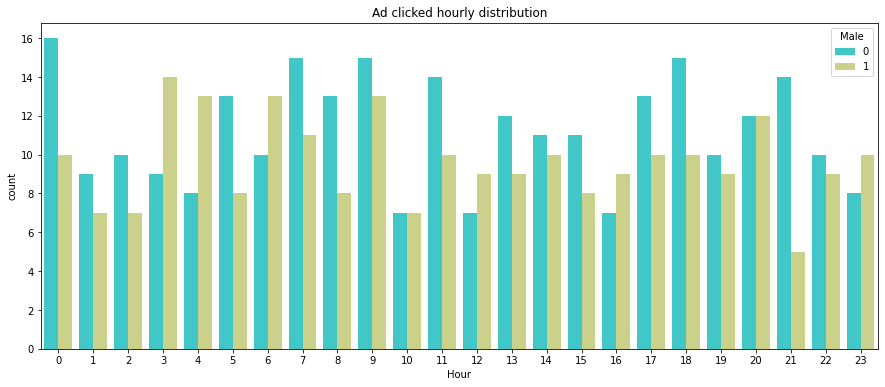

In [35]:
# Change datetime type from object to datetime64[ns]
data['Timestamp']=pd.to_datetime(data['Timestamp'])
# Now, let's create Hour, DayOfWeek, Month and Date columns from Timestamp
data['Hour']=data['Timestamp'].apply(lambda time : time.hour)
data['DayofWeek'] = data['Timestamp'].apply(lambda time : time.dayofweek)
data['Month'] = data['Timestamp'].apply(lambda time : time.month)
data['Date'] = data['Timestamp'].apply(lambda t : t.date())
# Ad clicked hourly distribution
plt.figure(figsize=(15,6))
sns.countplot(
    x='Hour', data=data[data['Clicked on Ad']==1],
    hue='Male', palette='rainbow',
    )
plt.title('Ad clicked hourly distribution')

As we can see women are the main contributor and overtake men by several hours.

Text(0.5, 1.0, 'Ad clicked daily distribution')

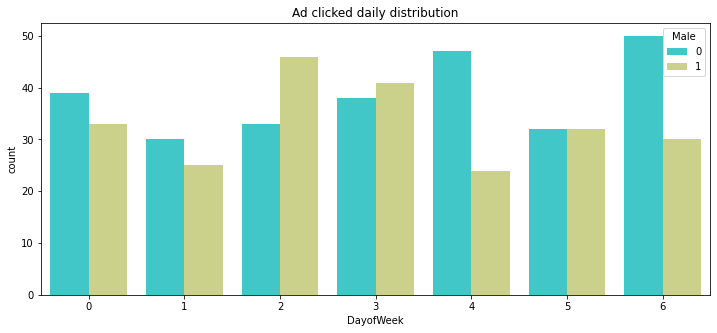

In [36]:
# Ad clicked daily distribution
plt.figure(figsize=(12,5))
sns.countplot(x='DayofWeek',data=data[data['Clicked on Ad']==1],hue='Male',palette='rainbow')
plt.title('Ad clicked daily distribution')

Most days, women click the ad more than men, except Wednesdays and Thursdays.

Text(0.5, 1.0, 'Ad clicked monthly distribution')

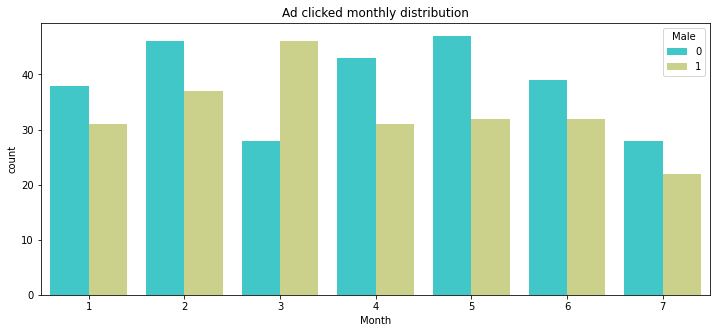

In [37]:
# Ad clicked monthly distribution
plt.figure(figsize=(12,5))
sns.countplot(x='Month',data=data[data['Clicked on Ad']==1],hue='Male',palette='rainbow')
plt.title('Ad clicked monthly distribution')

Throughout the year, women click the ad the most, except March.

In [38]:
data[data['Clicked on Ad']==1]['Date'].value_counts().head(5)

2016-02-14    8
2016-05-31    7
2016-02-28    6
2016-06-29    6
2016-02-03    6
Name: Date, dtype: int64

Valentine's Day (February 14) is the best-selling day for the company's announcement.

Text(0.5, 1.0, 'Age wise distribution of Ad clicks')

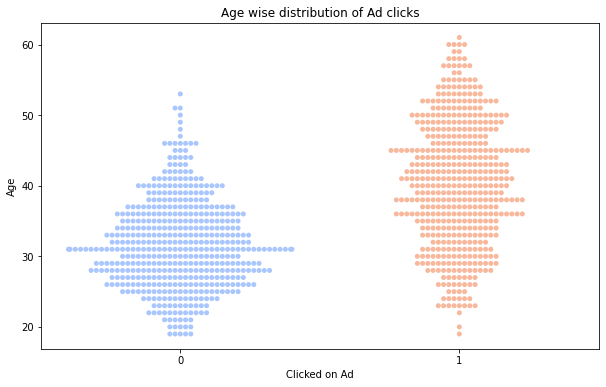

In [39]:
# Age wise distribution of Ad clicks
plt.figure(figsize=(10,6))
sns.swarmplot(x=data['Clicked on Ad'],y= data['Age'],data=data,palette='coolwarm')
plt.title('Age wise distribution of Ad clicks')

The population of around 40 is the largest contributor to ad clicks.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

Text(200, 60, 'Daily Internet Usage')

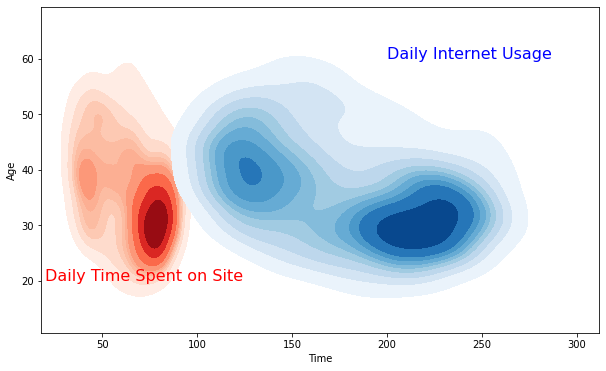

In [40]:
#Let's see Daily internet usage and daily time spent on site based on age
fig, axes = plt.subplots(figsize=(10, 6))
ax = sns.kdeplot(
    data['Daily Time Spent on Site'], data['Age'], cmap="Reds",
    shade=True, shade_lowest=False
    )
ax = sns.kdeplot(
    data['Daily Internet Usage'],data['Age'] ,cmap="Blues",
    shade=True, shade_lowest=False
    )
ax.set_xlabel('Time')
ax.text(20, 20, "Daily Time Spent on Site", size=16, color='r')
ax.text(200, 60, "Daily Internet Usage", size=16, color='b')

As can be seen, people around 30 spend a lot of time on the internet and on the site, but they don't click on the ads that are so frequent (the previous figure). Compared to them, the around 40-year-old population spends a little less time but clicks more on ads.

Text(0.5, 1.0, 'Clicked on Ad distribution based on area distribution')

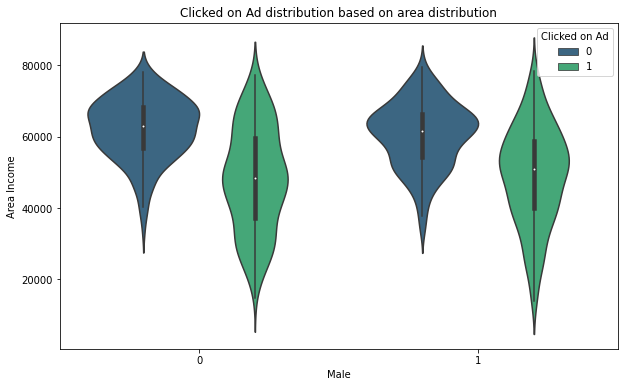

In [41]:
# Clicked on Ad distribution based on area distribution
plt.figure(figsize=(10,6))
sns.violinplot(x=data['Male'],y=data['Area Income'],data=data,palette='viridis',hue='Clicked on Ad')
plt.title('Clicked on Ad distribution based on area distribution')

Men and women with regional income below 50,000 are the main customers of Ad. Almost all those with income over 60k are not interested in clicking on Ad.

### Conclusion
Most of the time, women in their 40s in the income group of less than 50,000 in developing countries are the main consumers of ads, clicking unevenly throughout the day and mainly on Fridays and Sundays.

### Preparation of dataset

In [42]:
# Convert a categorical variable to dummy variables
country = pd.get_dummies(data['Country'])
# Let's drop the columns not required for building the model
data.drop(
    ['Ad Topic Line','City','Country','Timestamp','Date']
    ,axis=1, inplace=True
    )
# Now let's join the dummy values
data = pd.concat([data,country],axis=1)
# Display final result
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,DayofWeek,Month,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Bouvet Island (Bouvetoya),Brazil,British Indian Ocean Territory (Chagos Archipelago),British Virgin Islands,...,Spain,Sri Lanka,Sudan,Suriname,Svalbard & Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States Minor Outlying Islands,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,20,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dataset splitting Train/Test

In [43]:
y = data['Clicked on Ad'].values.reshape(-1, 1)
X = data.drop(['Clicked on Ad'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

### useful functions

In [44]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
  plt.figure(figsize=(6, 6))
  plt.title('Receiver Operating Characteristics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rtae')
  plt.xlabel('False Positive Rtae')

### Logistic regression

In [45]:
# Create a model
log_reg = LogisticRegression()
# Training
log_reg.fit(X_train, y_train.ravel())
# Prediction
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_log_reg = np.where(y_prob_log_reg > 0.5, 1, 0)

In [46]:
# Confusion matrix
confusion_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
confusion_matrix_log_reg

array([[85,  4],
       [16, 95]])

In [47]:
false_positive_rate_reg, true_positive_rate_reg, thresholds = roc_curve(
    y_test, y_prob_log_reg
    )
roc_auc_log_reg = auc(false_positive_rate_reg, true_positive_rate_reg)
roc_auc_log_reg

0.9592063974086447

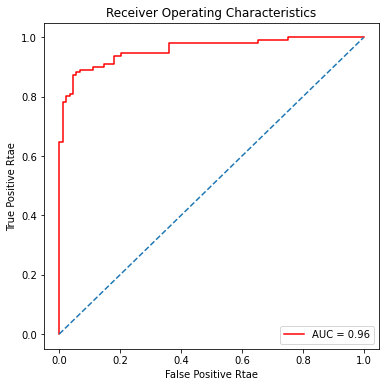

In [48]:
# Draw the ROC curve and get the area under the curve
plot_roc(roc_auc_log_reg, false_positive_rate_reg, true_positive_rate_reg)

### Linear discriminant analysis

In [49]:
# Create a model
lda = LinearDiscriminantAnalysis()
# Training
lda.fit(X_train, y_train.ravel())
# Prediction
y_prob_lda = lda.predict_proba(X_test)[:, 1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

In [50]:
# Confusion matrix
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
confusion_matrix_lda

array([[84,  5],
       [14, 97]])

In [51]:
false_positive_rate_lda, true_positive_rate_lda, thresholds = roc_curve(
    y_test, y_prob_lda
    )
roc_auc_lda = auc(false_positive_rate_lda, true_positive_rate_lda)
roc_auc_lda

0.9668994837534163

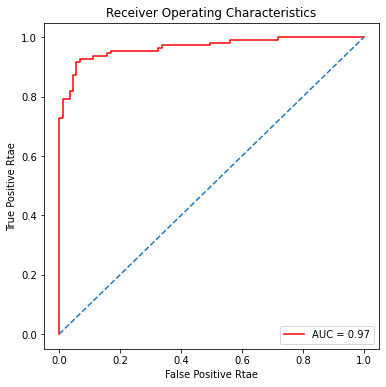

In [52]:
# Draw the ROC curve and get the area under the curve
plot_roc(roc_auc_lda, false_positive_rate_lda, true_positive_rate_lda)

### Quadratic discriminant analysis

In [53]:
# Create a model
qda = QuadraticDiscriminantAnalysis()
# Training
qda.fit(X_train, y_train.ravel())
# Prediction
y_prob_qda = qda.predict_proba(X_test)[:, 1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)
# Confusion matrix
confusion_matrix_qda = confusion_matrix(y_test, y_pred_qda)
false_positive_rate_qda, true_positive_rate_qda, thresholds = roc_curve(
    y_test, y_prob_qda
    )
roc_auc_qda = auc(false_positive_rate_qda, true_positive_rate_qda)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


As noted, there is a large covariance between the variables. In particular after the conversion of the “country” variable into dummy variables, the QDA model gives poor results.

In [54]:
roc_auc_qda

0.48572730033404193

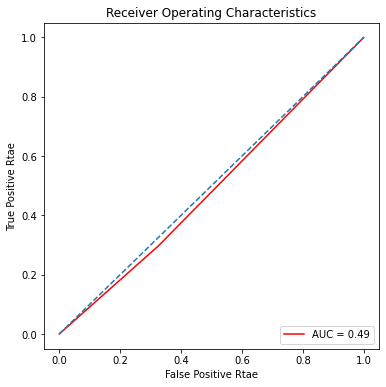

In [55]:
# Draw the ROC curve and get the area under the curve
plot_roc(roc_auc_qda, false_positive_rate_qda, true_positive_rate_qda)

### Conclusion & Comparaison

Text(0.5, 0, 'False Positive Rtae')

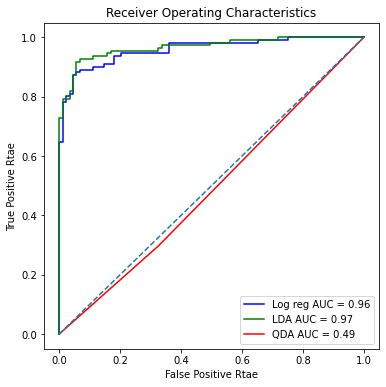

In [56]:
plt.figure(figsize=(6, 6))
plt.title('Receiver Operating Characteristics')
plt.plot(false_positive_rate_reg, true_positive_rate_reg, color='blue', label="Log reg AUC = {:.2f}".format(roc_auc_log_reg))
plt.plot(false_positive_rate_lda, true_positive_rate_lda, color='green', label='LDA AUC = {:.2f}'.format(roc_auc_lda))
plt.plot(false_positive_rate_qda, true_positive_rate_qda, color='red', label='QDA AUC = {:.2f}'.format(roc_auc_qda))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rtae')
plt.xlabel('False Positive Rtae')

Thus, for this problem, the linear discriminant analysis model gives better results than the logistic regression model and the quadratic discriminant analysis model. The quadratic discriminant analysis model to avoid.